#  📊 Student Mental Health Analysis
This notebook loads the cleaned data and applies various Python data analysis methods to explore and gain insights into student mental health. We will analyze key metrics like anxiety, stress, and other related factors using statistical methods and visualizations.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../data/cleaned_data.csv")
df.head()

,age,gender,university,department,academic_year,cgpa_range,stress_score,anxiety_score,depression_score,depression_label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,10,2,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,9,3,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,8,3,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,8,3,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,7,2,9,Mild Depression


In [16]:
df.shape

(1977, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1977 non-null   object
 1   gender            1977 non-null   object
 2   university        1977 non-null   object
 3   department        1977 non-null   object
 4   academic_year     1977 non-null   object
 5   cgpa_range        1977 non-null   object
 6   stress_score      1977 non-null   int64 
 7   anxiety_score     1977 non-null   int64 
 8   depression_score  1977 non-null   int64 
 9   depression_label  1977 non-null   object
dtypes: int64(3), object(7)
memory usage: 154.6+ KB


In [18]:
# Statistically summarized by df.describe()
# count, mean, standard deviation, minimum, and quartiles for each numerical column
df.describe()

,stress_score,anxiety_score,depression_score
count,1977.000000,1977.000000,1977.000000
mean,11.417805,3.517451,14.374305
std,4.651025,1.693589,6.659329
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,9.000000
50%,12.000000,4.000000,14.000000
75%,15.000000,5.000000,19.000000
max,19.000000,6.000000,27.000000


In [19]:
df.columns.tolist()

['age',
 'gender',
 'university',
 'department',
 'academic_year',
 'cgpa_range',
 'stress_score',
 'anxiety_score',
 'depression_score',
 'depression_label']

In [20]:
df.isnull().sum()

age                 0
gender              0
university          0
department          0
academic_year       0
cgpa_range          0
stress_score        0
anxiety_score       0
depression_score    0
depression_label    0
dtype: int64

In [21]:
#checking duplicate values
df.nunique()

age                  5
gender               3
university          15
department          12
academic_year        5
cgpa_range           6
stress_score        20
anxiety_score        7
depression_score    28
depression_label     6
dtype: int64

# Univariate Analysis
Analyzing the distribution, central tendency, and spread of data

## Bar Plot

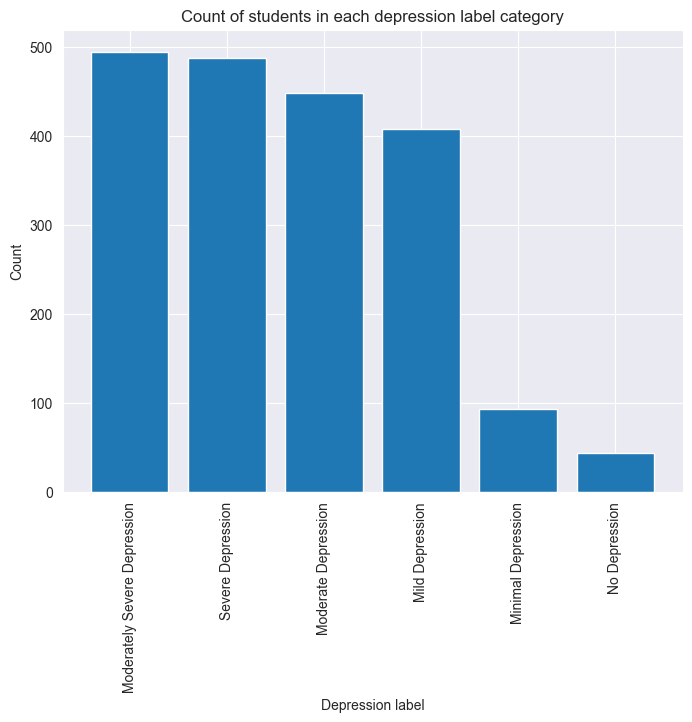

In [32]:
# Count of students in each depression label category
depression_counts = df['depression_label'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(depression_counts.index, depression_counts)
plt.title('Count of students in each depression label category')
plt.xlabel('Depression label')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


## Kernel Density Estimate (KDE) Plot

In [33]:
import seaborn as sns

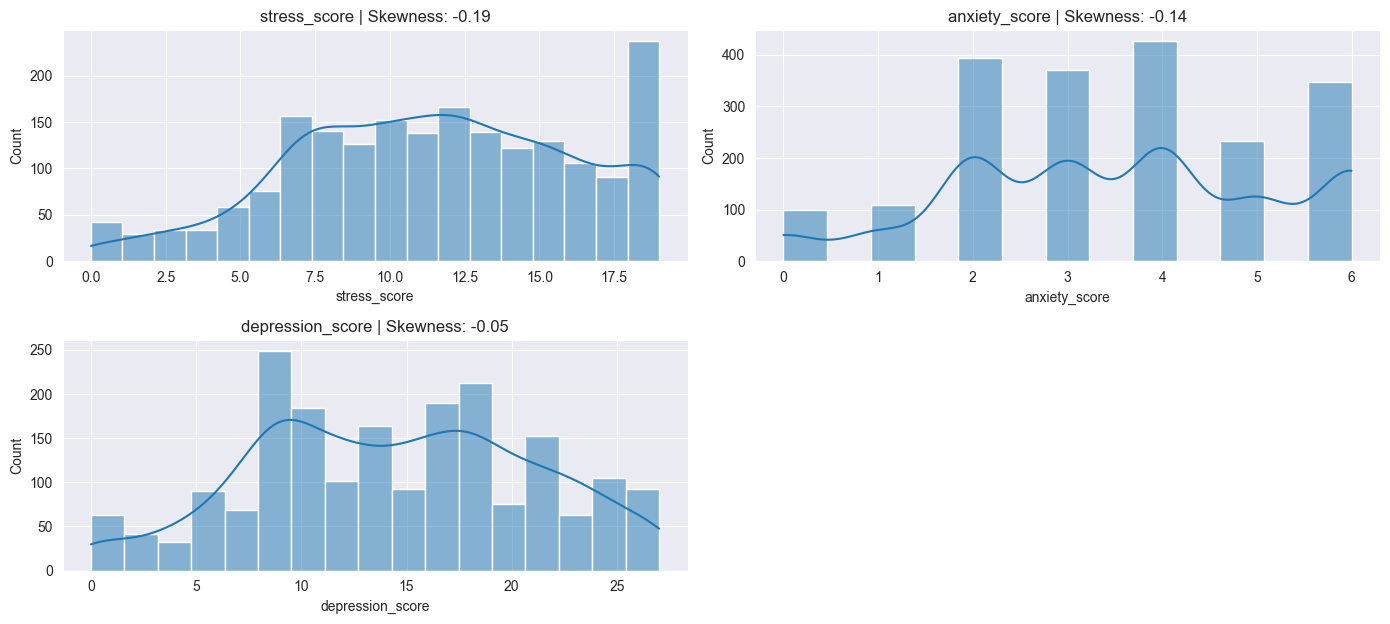

In [34]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

## Swarm Plot

C:\Users\Casper\AppData\Local\Temp\ipykernel_8620\342207706.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="age", y="depression_score", data=df, palette='viridis')
C:\Users\Casper\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Casper\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Casper\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.9% of the points cannot be placed; you may want

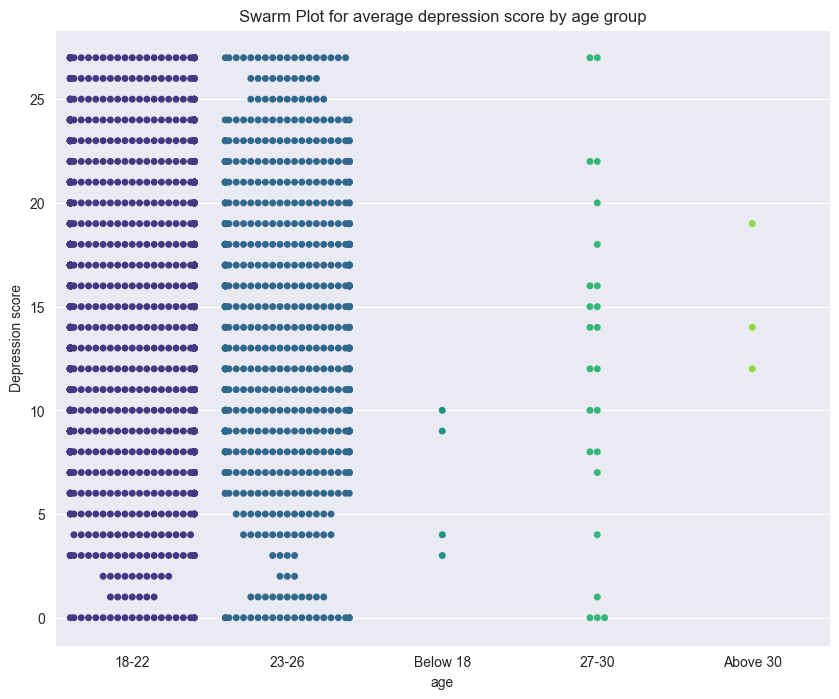

In [35]:
#Average depression score by age group
plt.figure(figsize=(10, 8))

sns.swarmplot(x="age", y="depression_score", data=df, palette='viridis')

plt.title('Swarm Plot for average depression score by age group')
plt.xlabel('age')
plt.ylabel('Depression score')
plt.show()

## Bivariate Analysis

<Figure size 1000x600 with 0 Axes>

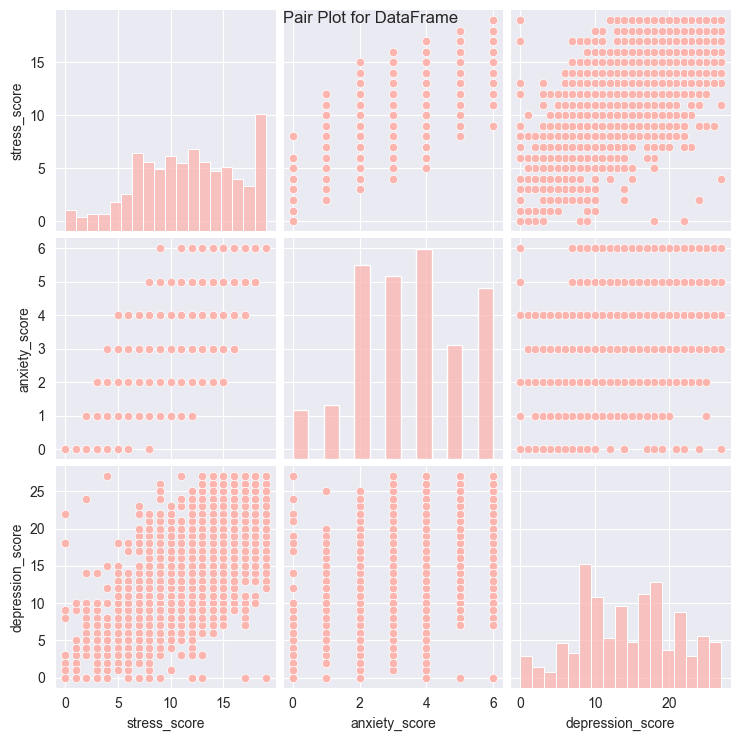

In [36]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

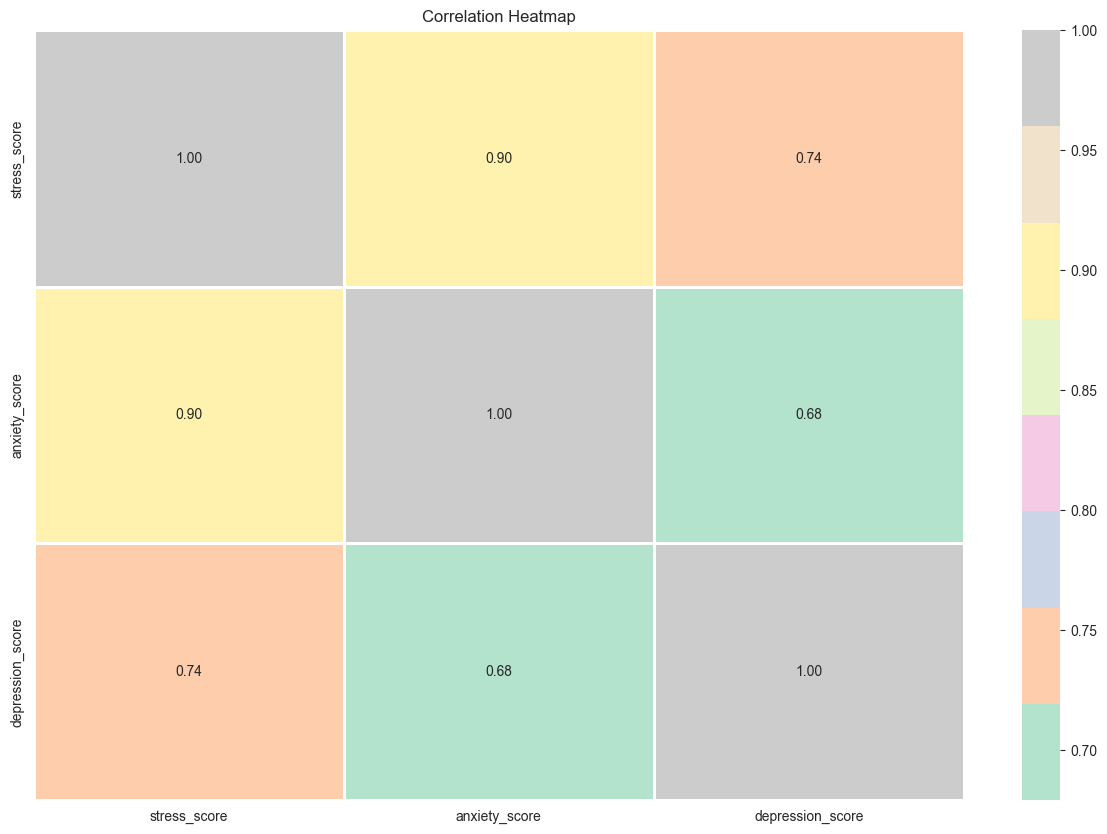

In [39]:
plt.figure(figsize=(15, 10))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

To include categorical features in numeric analysis like correlations or machine learning models, we will make LabelEncoding

| Encoder          | Use case                     | Output type               |
|------------------|------------------------------|---------------------------|
| LabelEncoder     | Ordinal categorical data      | One column, integers      |
| One-Hot Encoding | Nominal categorical data      | Multiple binary columns   |


| Column   | Type     | Recommended Encoding     |
|----------|----------|---------------------------|
| `gender` | Nominal  | One-Hot Encoding ✅       |
| `age`    | Ordinal  | Label Encoding ✅         |
| `department` | Nominal  | One-Hot Encoding ✅       |
| `depression_label` | Ordinal (if ordered like Mild < Moderate < Severe) | Label Encoding ✅ |

In [40]:
from sklearn.preprocessing import LabelEncoder

In [42]:
# Create a label encoder object
le = LabelEncoder()

# Example: encode 'age' and 'gender'
df['age_range_encoded'] = le.fit_transform(df['age'])
df['gender_encoded'] = le.fit_transform(df['gender'])

# You can print to check
print(df[['age', 'age_range_encoded']].drop_duplicates())

           age  age_range_encoded
0        18-22                  0
24       23-26                  1
46    Below 18                  4
191      27-30                  2
1620  Above 30                  3


In [43]:
# One-hot encode 'department', 'gender'
df_encoded = pd.get_dummies(df, columns=['department', 'gender'], drop_first=True)


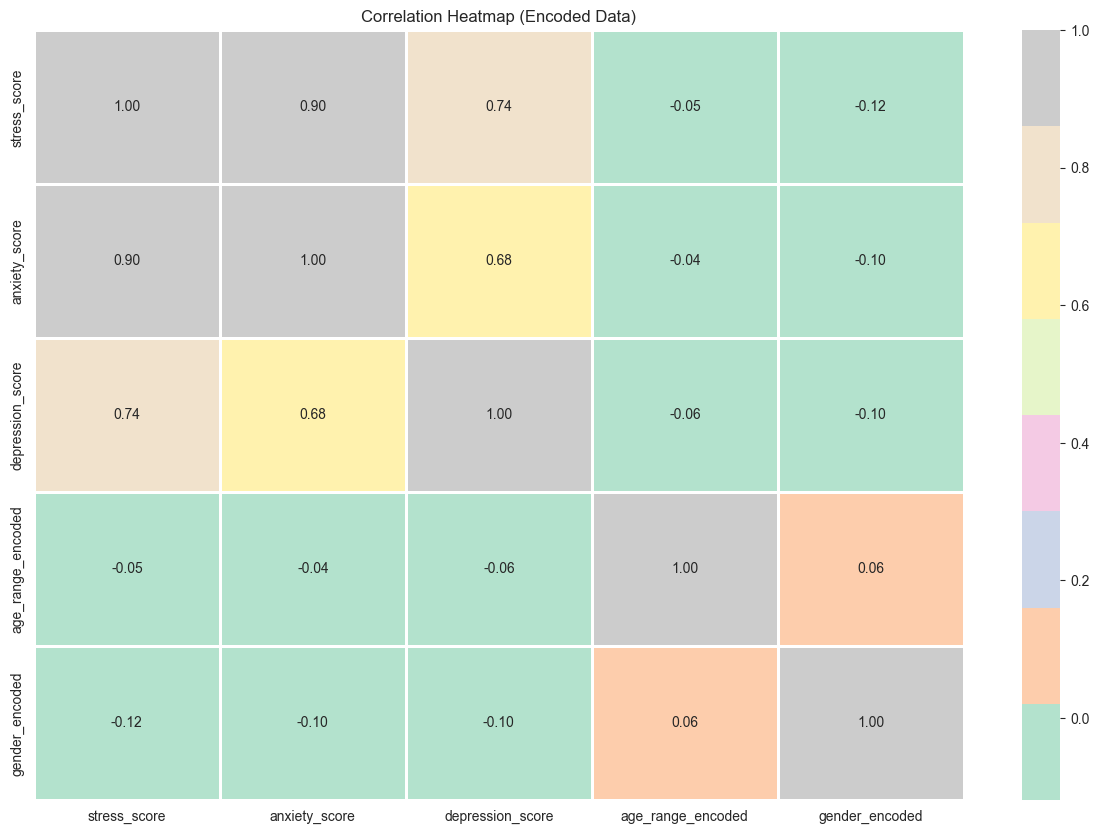

In [44]:
numeric_df = df_encoded.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap (Encoded Data)')
plt.show()
